In [15]:
import os

from ufcdata.query import DatabaseQuery
from ufcdata.tools import query_to_df

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import pickle as pkl

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [11]:
ROOT_DIR = os.path.dirname(os.path.abspath("top_level_file.txt"))
DATA_DIR = os.path.join(ROOT_DIR, 'data')
DATA_PATH = os.path.join(DATA_DIR, 'data_1.pkl')
DATA_2_PATH = os.path.join(DATA_DIR, 'data_2.pkl')

In [69]:
with open(DATA_2_PATH, 'rb') as f:
    df2 = pkl.load(f)
    
df2 = df2.dropna()
df2

,sig_head_made_disp,kd_disp,ctrl_disp,sub_att_disp,takedown_made_disp,reversals_disp,sig_str_avoid_disp,takedown_avoid_disp,opp_ctrl_disp,opp_sig_str_made_disp,opp_takedown_made_disp
10,4,1,2.0,0,0,0,3,0,-2.0,-4,0
11,-4,-1,-2.0,0,0,0,-3,0,2.0,4,0
14,25,0,53.0,0,2,0,3,1,-53.0,-29,-2
15,-25,0,-53.0,0,-2,0,-3,-1,53.0,29,2
16,6,0,-2.0,0,2,0,0,0,2.0,-4,-2
...,...,...,...,...,...,...,...,...,...,...,...
31523,1,0,47.0,0,0,0,-12,-3,-47.0,4,0
31524,4,0,0.0,0,0,0,14,0,0.0,-7,0
31525,-4,0,0.0,0,0,0,-14,0,0.0,7,0
31526,11,0,33.0,-3,0,0,2,2,-33.0,-11,0


In [130]:
pca_model = PCA(n_components=5)
pca = pca_model.fit_transform(StandardScaler().fit_transform(df2))
pca.shape

(20974, 5)

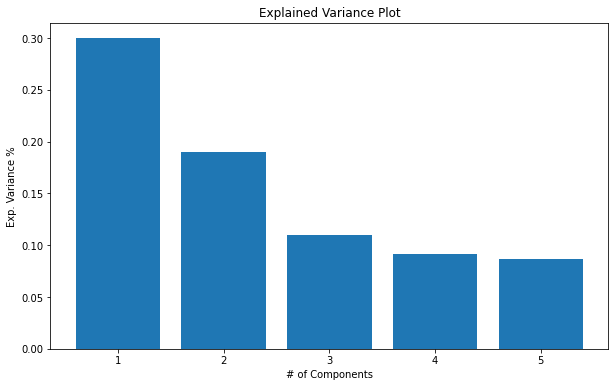

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(1, pca_model.n_components_ + 1), pca_model.explained_variance_ratio_)
ax.set(xlabel='# of Components', ylabel='Exp. Variance %', title='Explained Variance Plot')

plt.show()

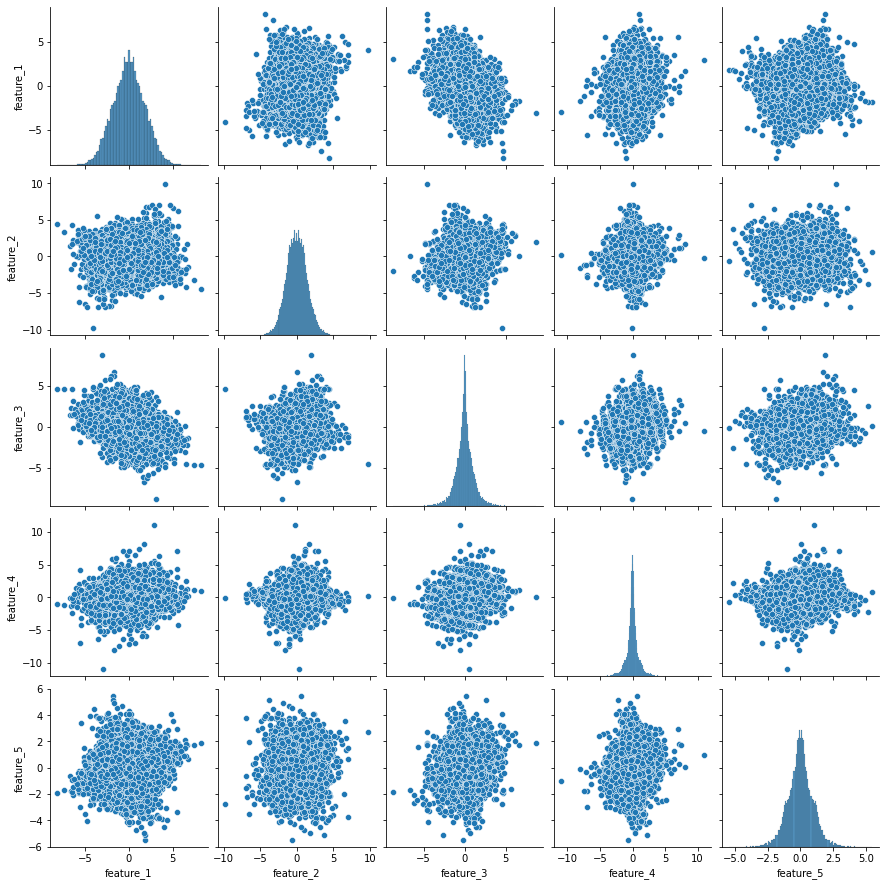

In [132]:

df_pca = pd.DataFrame(pca, columns=['feature_' + str(i) for i in range(1, pca_model.n_components_ + 1)])

pairplot = sb.pairplot(df_pca)

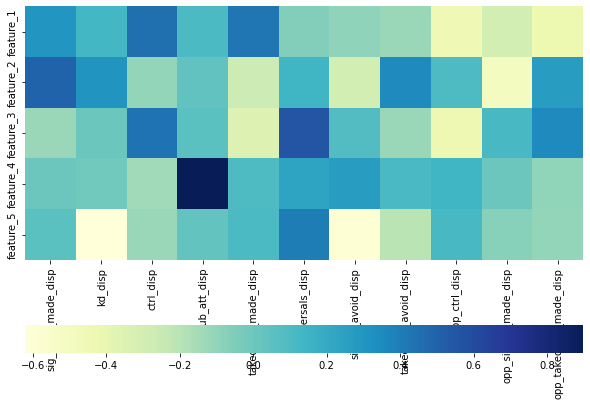

In [133]:
fig, ax = plt.subplots(figsize=(10, 8))

heatmap = sb.heatmap(pca_model.components_, cmap='YlGnBu',
                     yticklabels=['feature_' + str(i) for i in range(1, pca_model.n_components_ + 1)], 
                     xticklabels=df2.columns,
                     cbar_kws={'orientation': 'horizontal'}, ax=ax
                    )
ax.set_aspect("equal")

In [134]:
def biplot(score, coeff, labels, ax):
    x = score[:, 0]
    y = score[:, 1]
    
    n = coeff.shape[0]
    scalex = 1.0 / (x.max() - x.min())
    scaley = 1.0 / (y.max() - y.min())
    
    ax.scatter(x * scalex, y * scaley, s=2, color='black', alpha=0.3)
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
        
    ax.set(xlabel=f'feature_{1}', ylabel=f'feature_{2}', title='PCA Biplot')
    ax.grid(color='grey', ls=':', alpha=0.5)
    ax.axvline(0, -1, 1, c='b', ls='--')
    ax.axhline(0, -1, 1, c='b', ls='--')
    return ax



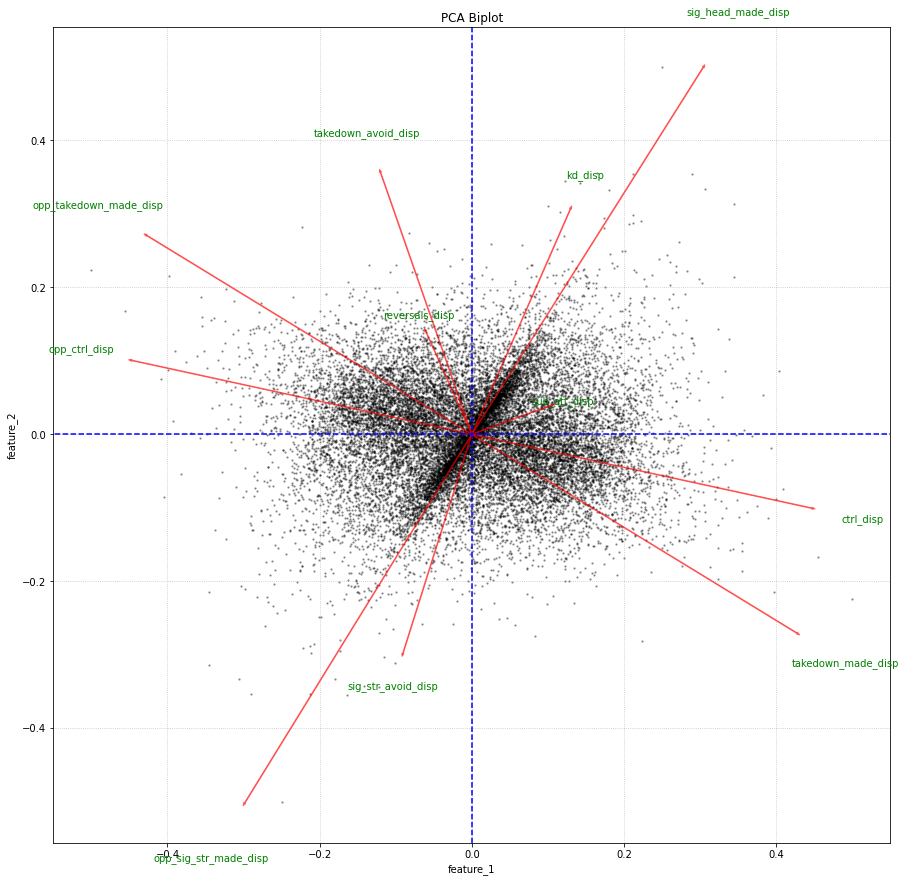

In [136]:
fig, ax = plt.subplots(figsize=(15, 15))

ax = biplot(df_pca[['feature_1', 'feature_2']].to_numpy(),
            np.transpose((pca_model.components_[0, :], pca_model.components_[1, :])),
            df2.columns, ax)